# Analysis of Data from Chronic Worry Study 

## Basic study structure:

1. Learn transition probabilities by pressing "1" or "0" and seeing how often each action leads to certain images. Before participant sees the image an action leads to (one image 60% of the time, another image 40% of the time), words of different valences are flashed on screen for 500 msec. Participants are instructed to ignore these words.


2. 30 second rest


3. Test period where two amounts of money are placed next to each image. Participant is asked to plan which action will get to the image with the most money.

10 conditions (2 rounds for each condition): 

Test phase: 20 probes, each with varying amounts of money associated with each image.

### Get basic info on subjects


In [1]:
import pandas as pd
import numpy as np

worry_data=pd.read_csv('../../raw_data/questionnaire_data.csv')
print('# Males={}'.format(np.sum(1*(worry_data['Response']=='Male'))))
print('# Females={}'.format(np.sum(1*(worry_data['Response']=='Female'))))

# Males=64
# Females=70


## Get Worry Questionnaire data

In [3]:
import pandas as pd
import numpy as np

#set up variables
PSWQ_Scores=[]
id_col='Participant Public ID'
reverse_scored=[1,3,8,10,11]
rs_dict={1:5,2:4,3:3,4:2,5:1}
current_score=0
reverse_score_counter=0
counter=0
IDs=['Holder']
sc=-1
#get row locations where PSWQ items are
ilocs=[]

#check if they faithfully filled out the questionnaire
rs_items=[]
non_rs_items=[]
sub=1
c_id=1
for row,data in worry_data.iterrows():
   
    if str(worry_data['Question Key'][row])=='BEGIN QUESTIONNAIRE' or row==19603:

        sc+=1
       
        if row!=0:
            PSWQ_Scores.append(current_score)
            if str(worry_data[id_col][row])!=IDs[c_id-1]:
                IDs.append(str(worry_data[id_col][row-5]))
                c_id+=1
        current_score=0
        reverse_score_counter=0
        counter=0
#         print('\n Reverse_Score_Check for Subject {}'.format(sub))
#         print('RS avg: {}'.format(np.mean(rs_items)))
#         print('NON RS avg: {}'.format(np.mean(non_rs_items)))
#         print('\n')
        sub+=1
        rs_items=[]
        non_rs_items=[]

    
    elif str(worry_data['Question Key'][row]).startswith('ps') and not str(worry_data['Question Key'][row]).endswith('quantised'):
        if len(worry_data['Question Key'][row])>5:
            if int(worry_data['Question Key'][row][-2:]) in reverse_scored:
                rs_items.append(int(worry_data['Response'][row]))
                current_score+=rs_dict[int(worry_data['Response'][row])]
                counter+=1
                reverse_score_counter+=1
                ilocs.append(row)
            else:
                non_rs_items.append(int(worry_data['Response'][row]))
                current_score+=int(worry_data['Response'][row])
                counter+=1
                ilocs.append(row)
        else:
            if int(worry_data['Question Key'][row][-1]) in reverse_scored:
                rs_items.append(int(worry_data['Response'][row]))
                current_score+=rs_dict[int(worry_data['Response'][row])]
                counter+=1
                reverse_score_counter+=1
                ilocs.append(row)
            else:
                current_score+=int(worry_data['Response'][row])
                non_rs_items.append(int(worry_data['Response'][row]))
                counter+=1
                ilocs.append(row)
            
#PSWQ_Scores.remove(0)
#np.save('PSWQ_Scores_ordered',PSWQ_Scores)
print(PSWQ_Scores)
print('Mean on PSWQ =\n {}'.format(np.mean(PSWQ_Scores)))
print('\n')

print('SD on PSWQ =\n {}'.format(np.std(PSWQ_Scores)))
print('\n')


print('# of subs = {}'.format(len(PSWQ_Scores)))


del IDs[0]
print(len(IDs))
print(IDs)

print(len(PSWQ_Scores))
print('\n {}'.format(sc))

[37, 51, 46, 60, 66, 61, 59, 69, 67, 72, 72, 31, 48, 39, 42, 57, 65, 64, 67, 60, 50, 57, 55, 79, 57, 39, 64, 60, 34, 58, 60, 41, 24, 70, 79, 71, 39, 63, 63, 37, 46, 56, 46, 41, 70, 75, 66, 62, 79, 59, 60, 62, 71, 76, 26, 46, 66, 48, 80, 55, 38, 34, 44, 66, 65, 72, 64, 31, 71, 39, 57, 64, 51, 62, 52, 68, 38, 55, 62, 55, 74, 78, 51, 53, 41, 39, 52, 39, 60, 56, 51, 32, 53, 33, 65, 78, 57, 58, 27, 47, 55, 46, 53, 42, 53, 49, 57, 52, 77, 55, 56, 36, 65, 71, 66, 38, 32, 54, 20, 65, 66, 55, 73, 30, 57, 57, 70, 43, 44, 58, 67, 61, 52, 79, 38]
Mean on PSWQ =
 55.162962962962965


SD on PSWQ =
 13.694122776879793


# of subs = 135
135
['5d9f7c84d8034b0016b65d29', '5da51a8bf0302100136151d8', '5da1b299de4ab0001989e3ff', '5cfe56e557dbb4001520553d', '5da09eda8a47e500148b64ea', '5cd1bd99447a9a001785f38f', '5d1a0cee19d2ed0017e21a26', '5da59a5264995200110bef1a', '5d2f7037b7548d0018c3709b', '5d02bcfe4f34fa00160c90e7', '5d8b9d48beb63200175975cb', '5c5e179b7b0a16000116f177', '5d75a12aa54634001557a7da', '5

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
#load  in data and just consider columsn of importance for analysis
part_order=IDs
df_task1=pd.read_csv('../../raw_data/task_v1.csv')
df_task2=pd.read_csv('../../raw_data/task_v2.csv')

df_task_v1=df_task1[['Participant Public ID','display','forced_choice','Response','image2','test_image1', 
                   'test_image2','test_image1_value', 
                   'test_image2_value']]

df_task_v2=df_task2[['Participant Public ID','display','forced_choice','Response','image2','test_image1', 
                   'test_image2','test_image1_value', 
                   'test_image2_value']]

# Define best-action dictionary for present design
# best action per condition (6 conditions)
best_answer_key_v1={'neutral_1': [[0, 'Drink 1.jpg'], [1, 'Timber 4.jpg']], 
                    'rare_positive_1': [[0, 'Acorns 2.jpg'], [1, 'Bark 5.jpg']], 
                    'neutral_2': [[0, 'Bricks 1.jpg'], [1, 'Fence 2.jpg']], 
                    'common_positive_1': [[0, 'Cold 2.jpg'], [1, 'Cups 3.jpg']], 
                    'rare_threat_1': [[0, 'Office supplies 4.jpg'], [1, 'Pumpkin 1.jpg']],
                    'common_threat_1': [[0, 'Power lines 1.jpg'], [1, 'Dirt 3.jpg']], 
                    'fifty_half_threat': [[0, 'Paper 5.jpg'], [1, 'Cotton swabs 3.jpg']],
                    'half_rare_threat_1': [[0, 'Keys 1.jpg'], [1, 'Storage 2.jpg']], 
                    'qt_neutral_2': [[0, 'Grass 6.jpg'], [1, 'Billiards 1.jpg']], 
                    'qt_rare_threat_1': [[0, 'Cups 1.jpg'], [1, 'Storage 1.jpg']]}


best_answer_key_v2={'neutral_1': [[0, 'Phone 1.jpg'], [1, 'Soccer 1.jpg']], 
                    'rare_positive_1': [[0, 'Keys 1.jpg'], [1, 'Fire hydrant 1.jpg']], 
                    'neutral_2': [[0, 'Billiards 1.jpg'], [1, 'Bubble 1.jpg']], 
                    'common_positive_1': [[0, 'Bricks 1.jpg'], [1, 'Acorns 2.jpg']], 
                    'rare_threat_1': [[0, 'Paper 5.jpg'], [1, 'Office supplies 1.jpg']], 
                    'common_threat_1': [[0, 'Office supplies 4.jpg'], [1, 'Fence 2.jpg']],
                    'fifty_half_threat': [[0, 'Cold 2.jpg'], [1, 'Fence 1.jpg']], 
                    'half_rare_threat_1': [[0, 'Snow 3.jpg'], [1, 'Storage 1.jpg']], 
                    'qt_neutral_2': [[0, 'Crosswalk 1.jpg'], [1, 'Crow 1.jpg']], 
                    'qt_rare_threat_1': [[0, 'Paintbrush 1.jpg'], [1, 'Grass 1.jpg']]}

#best answers per condition: lists
rt1=[]
rp1=[]
cp1=[]
n1=[]
n2=[]
qrt=[]
hrt=[]
qn=[]
fif=[]
ct1=[]


#count missing entries per condition
mrt1=0
mrp1=0
mcp1=0
mn1=0
mn2=0
mqrt=0
mhrt=0
mqn=0
mfif=0
mct1=0

all_sub_IDs=[]
value_differential=[]
miss_subs=[]

#subject specific data
rt_sub=[]
ct_sub=[]
rp_sub=[]
cp_sub=[]
neut1_sub=[]
neut2_sub=[]
qrt_sub=[]
qn_sub=[]
hrt_sub=[]
fif_sub=[]
sub_counter=0
choice_data_3d=np.zeros((135,8,20)) #to be populated below
for version in range(2):
    if version ==0:
        final_row=119712
        df_task_r=df_task_v1
    elif version==1:
        final_row=117972
        df_task_r=df_task_v2
#     print(df_task_r['Participant External Session ID'])

    temp_row=[]
    test_counter=0
    counter=0
    conditions=[]
    best_action_tally=0
    condition_counter=0
    
    current_subject=1
    current_choice_data=[]

    for row,data in df_task_r.iterrows():
    
        if str(df_task_r['display'][row]).startswith('test'):
            if counter==0:
                conditions.append(df_task_r['display'][row][5:])
                if version==0:
                    condition_info=best_answer_key_v1[conditions[counter]]
                elif version==1:
                    condition_info=best_answer_key_v2[conditions[counter]]
                    
                new_condition=0
                counter+=1
            elif df_task_r['display'][row][5:]!=conditions[counter-1]:
                
                        
                        conditions.append(df_task_r['display'][row][5:])
                        if version==0:
                            condition_info=best_answer_key_v1[conditions[counter]]
                        else:
                            condition_info=best_answer_key_v2[conditions[counter]]
                        
                       # if df_task_r['Participant Public ID'][row]=='5d1cf7d33f1d6f0001315d30':
                   
                            
                        
                        if conditions[counter-1]=='rare_threat_1':
                            rt1.append(best_action_tally)
                            rt_sub=current_choice_data


                        elif conditions[counter-1]=='rare_positive_1':
                            rp1.append(best_action_tally)
                            rp_sub=current_choice_data


                        elif conditions[counter-1]=='common_positive_1':
                            cp1.append(best_action_tally)
                            cp_sub=current_choice_data

                        elif conditions[counter-1]=='neutral_1':
                            n1.append(best_action_tally)
                            neut1_sub=current_choice_data

                        elif conditions[counter-1]=='neutral_2':
                            n2.append(best_action_tally)
                            neut2_sub=current_choice_data
                        
                        #new conditions
                        elif conditions[counter-1]=='common_threat_1':
                            ct1.append(best_action_tally)
                            ct_sub=current_choice_data
                            
                        elif conditions[counter-1]=='half_rare_threat_1':
                            hrt.append(best_action_tally)
                            hrt_sub=current_choice_data
                            
                        elif conditions[counter-1]=='fifty_half_threat':
                            fif.append(best_action_tally)
                            fif_sub=current_choice_data
                            
                        elif conditions[counter-1]=='qt_rare_threat_1':
                            qrt.append(best_action_tally)
                            qrt_sub=current_choice_data
                            
                        elif conditions[counter-1]=='qt_neutral_2':
                            qn.append(best_action_tally)
                            qn_sub=current_choice_data
                        
                    
                        
                    
                            
                        
                        counter+=1
                        best_action_tally=0
                        current_choice_data=[]
                        condition_counter+=1
                        #after 10 blocks, new subject

                        if condition_counter==10:
          
                            current_subject+=1
                          
                            if len(neut1_sub)<20:
                          
                                neut1_sub=[int(x) for x in neut1_sub+np.zeros(20-len(neut1_sub)).tolist()]


                            if len(neut2_sub)<20:
                                print(current_subject)
                                print('how much is missing: {}'.format(20-len(neut2_sub)))
                                mn2+=1
                                neut2_sub=[int(x) for x in neut2_sub+np.zeros(20-len(neut2_sub)).tolist()]
        

                            if len(rt_sub)<20:
                                print('how much is missing: {}'.format(20-len(rt_sub)))
                                rt_sub=[int(x) for x in rt_sub+np.zeros(20-len(rt_sub)).tolist()]
                                
                                print(current_subject)
                                mrt1+=1

                            if len(rp_sub)<20:
                                print('how much is missing: {}'.format(20-len(rp_sub)))
                                rp_sub=[int(x) for x in rp_sub+np.zeros(20-len(rp_sub)).tolist()]
                                print(current_subject)
                                
                                mrp1+=1

                            if len(cp_sub)<20:
                                print('how much is missing: {}'.format(20-len(cp_sub)))
                                cp_sub=[int(x) for x in cp_sub+np.zeros(20-len(cp_sub)).tolist()]
                                
                                print(current_subject)
                                mcp1+=1
                            
                            if len(ct_sub)<20:
                                print('how much is missing: {}'.format(20-len(ct_sub)))
                                ct_sub=[int(x) for x in ct_sub+np.zeros(20-len(ct_sub)).tolist()]
                                
                                print(current_subject)
                                print('ct')
                                mct1+=1
                            if len(qn_sub)<20:
                                print('how much is missing: {}'.format(20-len(qn_sub)))
                                qn_sub=[int(x) for x in qn_sub+np.zeros(20-len(qn_sub)).tolist()]
                                
                                print(current_subject)
                                print('qn')
                                mqn+=1
                            if len(qrt_sub)<20:
                                print('how much is missing: {}'.format(20-len(qrt_sub)))
                                qrt_sub=[int(x) for x in qrt_sub+np.zeros(20-len(qrt_sub)).tolist()]
                                print(current_subject)
                                print('qrt')
                                mqrt+=1
                            if len(hrt_sub)<20:
                                print('how much is missing: {}'.format(20-len(hrt_sub)))
                                hrt_sub=[int(x) for x in hrt_sub+np.zeros(20-len(hrt_sub)).tolist()]
                                
                                print(current_subject)
                                print('hrt')
                                mhrt+=1
                            if len(fif_sub)<20:
                                print('how much is missing: {}'.format(20-len(fif_sub)))
                                fif_sub=[int(x) for x in fif_sub+np.zeros(20-len(fif_sub)).tolist()]
                                
                                print(current_subject)
                                print('fif')
                                mfif+=1
                            


                            #simulate two equal rounds
                            choice_data_3d[sub_counter,0]=neut2_sub
                            choice_data_3d[sub_counter,1]=cp_sub
                            choice_data_3d[sub_counter,2]=ct_sub
                            choice_data_3d[sub_counter,3]=rp_sub
                            choice_data_3d[sub_counter,4]=rt_sub
                            choice_data_3d[sub_counter,5]=hrt_sub
                            choice_data_3d[sub_counter,6]=qrt_sub
                            choice_data_3d[sub_counter,7]=qn_sub
#                             choice_data_3d[sub_counter,8]=fif_sub
                            
                            all_sub_IDs.append(df_task_r['Participant Public ID'][row-400])
                            sub_counter+=1
                           
                        
                            condition_counter=0

                            rt_sub=[]
                            ct_sub=[]
                            rp_sub=[]
                            cp_sub=[]
                            neut1_sub=[]
                            neut2_sub=[]
                            qrt_sub=[]
                            qn_sub=[]
                            hrt_sub=[]
                            fif_sub=[]

            else:
                new_condition=0

            #Get values and convert from strings to floating point
            value1=df_task_r['test_image1_value'][row]
            if "p" in value1:
                if value1.startswith('2'):
                    value1=float(value1[0:2])*.01
                else:   
                    value1=float(value1[0:4])

            else:
                if value1.startswith('£'):
                    value1=float(value1[1])
                else:
                    value1=float(value1[0])


            value2=df_task_r['test_image2_value'][row]
            if "p" in value2:
                if value2.startswith('2'):
                    value2=float(value2[0:2])*.01
                else:   
                    value2=float(value2[0:4])
            else:
                if value2.startswith('£'):
                    value2=float(value2[1])
                else:
                    value2=float(value2[0])


            if value1>value2:

                best_option=df_task_r['test_image1'][row]
            else:
                best_option=df_task_r['test_image2'][row]



            #get response and convert to integer
            try:
                current_response=int(df_task_r['Response'][row])
            except:
                current_response='missing'




            # determine if participant made best choice
            for info_total in condition_info:
                for info in info_total:
                    if best_option == str(info):
                        best_action=info_total[0]
            

            #for last subject only that doesn't meet the condition above for indexing
            if row==final_row:
                if version==0:
                    rt1.append(best_action_tally)
                    rt_sub=current_choice_data
                    all_sub_IDs.append(df_task_r['Participant Public ID'][row])
                    
 
                    
                else:
                    cp1.append(best_action_tally)
                    cp_sub=current_choice_data
                    all_sub_IDs.append(df_task_r['Participant Public ID'][row])
                    
                    print(df_task_r['Participant Public ID'][row-5])
                    print(sub_counter)


                if len(neut1_sub)<20:
                    
                    neut1_sub=[int(x) for x in neut1_sub+np.zeros(20-len(neut1_sub)).tolist()]

                if len(neut2_sub)<20:
                    neut2_sub=[int(x) for x in neut2_sub+np.zeros(20-len(neut2_sub)).tolist()]

                if len(rt_sub)<20:
                    rt_sub=[int(x) for x in rt_sub+np.zeros(20-len(rt_sub)).tolist()]

                if len(rp_sub)<20:
                    rp_sub=[int(x) for x in rp_sub+np.zeros(20-len(rp_sub)).tolist()]

                if len(cp_sub)<20:
                    cp_sub=[int(x) for x in cp_sub+np.zeros(20-len(cp_sub)).tolist()]
                    
                if len(ct_sub)<20:
                    ct_sub=[int(x) for x in ct_sub+np.zeros(20-len(ct_sub)).tolist()]
                if len(qn_sub)<20:
                    qn_sub=[int(x) for x in qn_sub+np.zeros(20-len(qn_sub)).tolist()]
                if len(qrt_sub)<20:
                    qrt_sub=[int(x) for x in qrt_sub+np.zeros(20-len(qrt_sub)).tolist()]
                if len(hrt_sub)<20:
                    hrt_sub=[int(x) for x in hrt_sub+np.zeros(20-len(hrt_sub)).tolist()]
                if len(fif_sub)<20:
                    fif_sub=[int(x) for x in fif_sub+np.zeros(20-len(fif_sub)).tolist()]


             
                choice_data_3d[sub_counter,0]=neut2_sub
                choice_data_3d[sub_counter,1]=cp_sub
                choice_data_3d[sub_counter,2]=ct_sub
                choice_data_3d[sub_counter,3]=rp_sub
                choice_data_3d[sub_counter,4]=rt_sub
                choice_data_3d[sub_counter,5]=hrt_sub
                choice_data_3d[sub_counter,6]=qrt_sub
                choice_data_3d[sub_counter,7]=qn_sub
#                 choice_data_3d[sub_counter,8]=fif_sub
                sub_counter+=1



                condition_counter=0

                rt_sub=[]
                ct_sub=[]
                rp_sub=[]
                cp_sub=[]
                neut1_sub=[]
                neut2_sub=[]
                qrt_sub=[]
                qn_sub=[]
                hrt_sub=[]
                fif_sub=[]

            else:

                if current_response==best_action:
                    best_action_tally+=1
                    current_choice_data.append(1.0)
                    if current_subject==1:
                        if test_counter<21:
                            test_counter+=1
                            temp_row.append(np.abs(value1-value2))
                        else:
                            value_differential.append(temp_row)
                            temp_row=[]
                            test_counter=2
                            temp_row.append(np.abs(value1-value2))
                elif current_response=='missing':
                    x='missing'
                    miss_subs.append(sub_counter)
                else:
                    current_choice_data.append(0.0)
                    if current_subject==1:
                        if test_counter<21:
                            test_counter+=1
                            temp_row.append(np.abs(value1-value2))
                        else:
                            value_differential.append(temp_row)
                            temp_row=[]
                            test_counter=2
                            temp_row.append(np.abs(value1-value2))

value_differential.append(temp_row)


print('\n')
print('#Subjects:')
print(len(all_sub_IDs))
print('\n')

        

order_data=[]
print(len(all_sub_IDs))

for subj in all_sub_IDs:
    counter=0
    for s in IDs:
        if subj==s:
            order_data.append(counter)
        counter+=1

choice_data_3d = choice_data_3d.astype(int)
#np.save('data_reduced',choice_data_3d)

print(mrt1)
print(mrp1)
print(mcp1)
print(mn1)
print(mn2)
print(mqrt)
print(mhrt)
print(mqn)
print(mfif)
print(mct1)


/home/paulsharp/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


how much is missing: 1
3
hrt
how much is missing: 1
4
how much is missing: 1
4
fif
how much is missing: 2
10
ct
how much is missing: 1
10
hrt
how much is missing: 1
10
fif
how much is missing: 1
12
hrt
how much is missing: 1
12
fif
how much is missing: 1
13
how much is missing: 1
16
qn
how much is missing: 1
16
fif
how much is missing: 1
18
hrt
19
how much is missing: 1
how much is missing: 1
21
how much is missing: 1
21
ct
how much is missing: 1
21
qrt
how much is missing: 1
24
26
how much is missing: 3
how much is missing: 2
26
hrt
how much is missing: 3
26
fif
37
how much is missing: 1
how much is missing: 2
37
how much is missing: 3
42
fif
43
how much is missing: 3
how much is missing: 1
43
how much is missing: 1
43
how much is missing: 1
46
qn
how much is missing: 5
49
ct
how much is missing: 1
49
hrt
50
how much is missing: 1
how much is missing: 1
50
how much is missing: 1
50
ct
how much is missing: 1
52
how much is missing: 1
52
how much is missing: 1
52
ct
how much is missing:

In [104]:
print(order_data)
PSWQ_Scores_Ordered=[PSWQ_Scores[i] for i in order_data]
#np.save('PSWQ_Ordered',PSWQ_Scores_Ordered)
IDs_ordered=[IDs[i] for i in order_data]
#np.save('choice_data_hard',choice_data_3d)
order_data_2=[]
for subj in all_sub_IDs:
    counter=0
    for s in IDs_ordered:
        if subj==s:
            order_data_2.append(counter)
        counter+=1


[0, 2, 10, 5, 7, 14, 15, 17, 12, 22, 21, 24, 27, 29, 30, 19, 33, 34, 36, 39, 41, 43, 45, 48, 46, 49, 52, 55, 59, 60, 62, 63, 65, 67, 69, 74, 73, 72, 76, 79, 81, 82, 84, 87, 88, 90, 95, 96, 98, 100, 101, 102, 103, 106, 107, 109, 113, 114, 118, 119, 121, 123, 124, 125, 128, 131, 133, 134, 4, 8, 1, 3, 6, 9, 11, 13, 18, 16, 23, 20, 26, 28, 25, 31, 32, 37, 35, 38, 40, 42, 44, 47, 50, 51, 53, 54, 57, 56, 58, 61, 64, 66, 68, 70, 71, 75, 77, 78, 80, 83, 85, 86, 89, 92, 91, 93, 94, 97, 99, 104, 105, 110, 108, 111, 112, 115, 116, 117, 120, 122, 126, 127, 129, 130, 132]


In [5]:



bad_subs=[]
for sub in range(len(choice_data_3d)):
    count=0
    sum_cond=np.sum(choice_data_3d[sub,:,:],axis=1)
    for num in sum_cond[0:5]:
        if num<11:
            count+=1
    if count>3:
        bad_subs.append(sub)

print(bad_subs)

# print(choice_data_3d[127,:,:])
choice_data_clean=np.delete(choice_data_3d,(bad_subs),axis=0)
#np.save('choice_data_nofifty',choice_data_clean)

print(len(choice_data_clean))
# bad_subs=[]
# for sub in range(len(choice_data_clean)):
#     count=0
#     sum_cond=np.sum(choice_data_clean[sub,:,:],axis=1)
#     for num in sum_cond[0:5]:
#         if num<11:
#             count+=1
#     if count>3:
#         bad_subs.append(sub)

# print(bad_subs)

[121, 125, 127]
132


# Visualize distributions of each condition

132
rt1 17.484848484848484
rt distorted count = 8

hrt 17.053030303030305
hrt distorted count = 18

qrt 16.515151515151516
qrt distorted count = 18

rp1 17.113636363636363
cp1 17.007575757575758
ct1 16.96969696969697

 n2 17.446969696969695
n2 distorted count = 11


 qn2 17.265151515151516
q n2 distorted count = 12

ModeResult(mode=array([20]), count=array([66]))
{0: 2, 1: 2, 3: 1, 6: 3, 7: 1, 8: 1, 9: 1, 10: 2, 11: 2, 12: 3, 13: 3, 14: 1, 16: 2, 17: 6, 18: 13, 19: 23, 20: 66}
ModeResult(mode=array([20]), count=array([59]))
{0: 3, 2: 1, 4: 3, 5: 1, 7: 3, 9: 2, 10: 3, 11: 3, 12: 5, 13: 1, 14: 1, 15: 3, 16: 1, 17: 4, 18: 13, 19: 26, 20: 59}
ModeResult(mode=array([20]), count=array([61]))
{0: 3, 1: 1, 3: 2, 4: 1, 5: 2, 6: 1, 7: 1, 8: 3, 10: 5, 11: 2, 12: 2, 13: 2, 14: 1, 16: 4, 17: 3, 18: 11, 19: 27, 20: 61}
ModeResult(mode=array([20]), count=array([66]))
{0: 3, 1: 1, 2: 1, 4: 2, 5: 1, 6: 1, 7: 1, 8: 5, 9: 1, 10: 2, 11: 1, 12: 1, 13: 4, 14: 1, 16: 4, 17: 2, 18: 11, 19: 24, 20: 66}
ModeRes

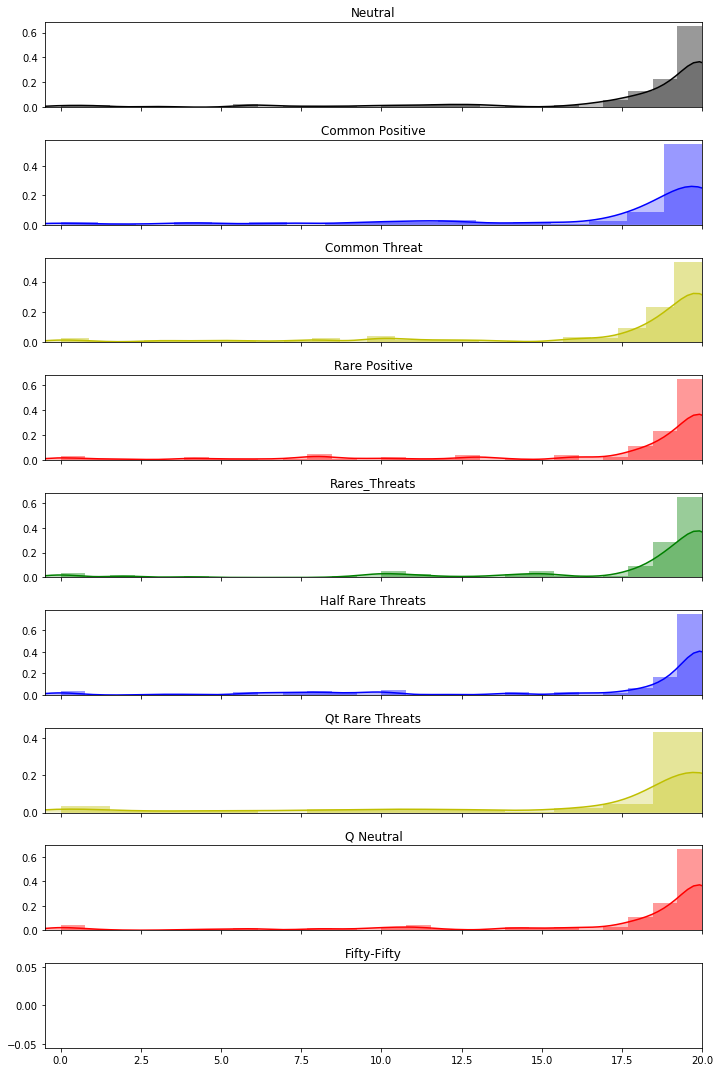

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from bayesian_bootstrap.bootstrap import mean, highest_density_interval
import pandas as pd
from scipy.stats import mode
import numpy
n=[]
cp=[]
ct=[]
rp=[]
rt=[]
ht=[]
qt=[]
qn=[]
h=[]

dn=[]
dqn=[]
drt=[]
dqt=[]
dh=[]

print(len(choice_data_clean))
for sub in range(len(choice_data_clean)):
    sum_cond=np.sum(choice_data_clean[sub,:,:],axis=1)
    n.append(sum_cond[0])
    cp.append(sum_cond[1])
    ct.append(sum_cond[2])
    rp.append(sum_cond[3])
    rt.append(sum_cond[4])
    ht.append(sum_cond[5])
    qt.append(sum_cond[6])
    qn.append(sum_cond[7])
#     h.append(sum_cond[8])

number_distorted=10
print('rt1 {}'.format(np.mean(rt)))
distorted=0
for num in rt:
    if num <number_distorted:
        distorted+=1
        drt.append(1)
    else:
        drt.append(0)

print('rt distorted count = {}\n'.format(distorted))
print('hrt {}'.format(np.mean(ht)))
distorted=0
for num in ht:
    if num <number_distorted:
        distorted+=1
print('hrt distorted count = {}\n'.format(distorted))
print('qrt {}'.format(np.mean(qt)))
distorted=0
for num in qt:
    if num <number_distorted:
        distorted+=1
        dqt.append(1)
    else:
        dqt.append(0)
print('qrt distorted count = {}\n'.format(distorted))
print('rp1 {}'.format(np.mean(rp)))
print('cp1 {}'.format(np.mean(cp)))
print('ct1 {}'.format(np.mean(ct)))
print('\n n2 {}'.format(np.mean(n)))
distorted=0
for num in n:
    if num <number_distorted:
        distorted+=1
        dn.append(1)
    else:
        dn.append(0)
print('n2 distorted count = {}\n'.format(distorted))
print('\n qn2 {}'.format(np.mean(qn)))
distorted=0
for num in qn:
    if num <number_distorted:
        distorted+=1
        dqn.append(1)
    else:
        dqn.append(0)
print('q n2 distorted count = {}\n'.format(distorted))

distorted=0


# for num in h:
#     if num==10:
#         dh.append(0)
#     elif num<10:
#         dh.append(((num-10)*-1)**1.5)
#     elif num>10:
#         dh.append(((num-10)**1.5)*-1)
# print(len(dh))



print(mode(n))
unique, counts = numpy.unique(n, return_counts=True)
print(dict(zip(unique, counts)))
print(mode(cp))
unique, counts = numpy.unique(cp, return_counts=True)
print(dict(zip(unique, counts)))
print(mode(ct))
unique, counts = numpy.unique(ct, return_counts=True)
print(dict(zip(unique, counts)))
print(mode(rp))
unique, counts = numpy.unique(rp, return_counts=True)
print(dict(zip(unique, counts)))
print(mode(rt))
unique, counts = numpy.unique(rt, return_counts=True)
print(dict(zip(unique, counts)))

print(mode(ht))
unique, counts = numpy.unique(ht, return_counts=True)
print(dict(zip(unique, counts)))

print(mode(qt))
unique, counts = numpy.unique(qt, return_counts=True)
print(dict(zip(unique, counts)))

print(mode(qn))
unique, counts = numpy.unique(qn, return_counts=True)
print(dict(zip(unique, counts)))

print(mode(h))
unique, counts = numpy.unique(h, return_counts=True)
print(dict(zip(unique, counts)))


#graph distributions
f, axs = plt.subplots(9, 1, figsize=(10, 15),sharex=True)

ax0=sns.distplot(n, hist=True,kde_kws={"shade": True},color="k", ax=axs[0])
ax0.set(title='Neutral',xlabel='')

ax1=sns.distplot(cp, hist=True,kde_kws={"shade": True},color="b", ax=axs[1])
ax1.set(title='Common Positive',xlabel='')

ax2=sns.distplot(ct, hist=True,kde_kws={"shade": True},color="y", ax=axs[2])
ax2.set(title='Common Threat',xlabel='')

ax3=sns.distplot(rp, hist=True,kde_kws={"shade": True},color="r", ax=axs[3])
ax3.set(title='Rare Positive',xlabel='')

ax4=sns.distplot(rt, hist=True,kde_kws={"shade": True},color="g", ax=axs[4])
ax4.set(title='Rares_Threats',xlabel='')

ax5=sns.distplot(ht, hist=True,kde_kws={"shade": True},color="b", ax=axs[5])
ax5.set(title='Half Rare Threats',xlabel='')

ax6=sns.distplot(qt, hist=True,kde_kws={"shade": True},color="y", ax=axs[6])
ax6.set(title='Qt Rare Threats',xlabel='')

ax7=sns.distplot(qn, hist=True,kde_kws={"shade": True},color="r", ax=axs[7])
ax7.set(title='Q Neutral',xlabel='')

ax8=sns.distplot(h, hist=True,kde_kws={"shade": True},color="k", ax=axs[8])
ax8.set(title='Fifty-Fifty',xlabel='')

plt.tight_layout()
plt.xlim(-0.5, 20)
plt.show()

In [13]:
from scipy.stats import sem
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp

print('difference between Rare Threat Full and Reduced Distortions')
print(ttest_rel(qt,rt))
print('\n')
print('difference between Neutral Full and Reduced Distortions')
print(ttest_rel(qn,n))

# print('\n')
# print(np.mean(h))


# print(ttest_1samp(dh,0.0))
# print(ttest_1samp(h,10.0))



difference between Rare Threat Full and Reduced Distortions
Ttest_relResult(statistic=-1.8055133600494715, pvalue=0.07329076609341757)


difference between Neutral Full and Reduced Distortions
Ttest_relResult(statistic=-0.4195427554068559, pvalue=0.6755067314893303)


In [107]:
from scipy.stats import pearsonr as corrp
worry_data=np.load('PSWQ_Ordered_Data.npy')
worry_data_cleaned=np.delete(worry_data,(bad_subs))
worry_data=[((x-np.mean(worry_data))/np.std(worry_data)) for x in worry_data]

#np.save('worry_data_preprocessed',worry_data_cleaned)
# np.save('choice_data_preprocessed',choice_data_clean)

r2,pval2=corrp(h,worry_data_cleaned)

print('Bias Emotion and Chronic Worry Correlation')
print('corr: {}, pval:{}\n'.format(r2,pval2))
print(r2)

Bias Emotion and Chronic Worry Correlation
corr: -0.041726939543141515, pval:0.6347489860237853

-0.041726939543141515
